<a href="https://colab.research.google.com/github/mokanapriya/Autoencoder/blob/main/Deep_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Facial Emotion Recognition using Autoencoder**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install scikit-plot
!pip install numpy opencv-python pillow tensorflow keras imutils scikit-learn matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import scikitplot

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils
from matplotlib import pyplot
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization
import os
print(os.listdir("/content/drive/MyDrive/Autoencoder/Autoencoder-FER-CA/JAFFE/jaffedbase/jaffedbase"))


# Any results you write to the current directory are saved as output

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.datasets import make_classification
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


In [6]:
data_path = '/content/drive/MyDrive/Autoencoder/Autoencoder-FER-CA/JAFFE/jaffedbase/jaffedbase'
data_dir_list = os.listdir(data_path)

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-Angry

Loaded the images of dataset-Disgust

Loaded the images of dataset-Fear

Loaded the images of dataset-Happy

Loaded the images of dataset-Neutral

Loaded the images of dataset-Sad

Loaded the images of dataset-Surprise



(213, 48, 48)

In [7]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29]=0 #30
labels[30:58]=1 #29
labels[59:90]=2 #32
labels[91:121]=3 #31
labels[122:151]=4 #30
labels[152:182]=5 #31
labels[183:212]=6 #30

names = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

def getLabel(id):
    return ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise'][id]

In [8]:
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((170, 48, 48), (43, 48, 48), (170, 7), (43, 7))

In [9]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [10]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

X_train.shape,X_test.shape

((170, 2304), (43, 2304))

In [11]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop

In [14]:
input_size = 2304  # 48 x 48

output_size = 2304

In [15]:
import keras
from keras import layers

input_img = keras.Input(shape=(input_size,))

encoded = layers.Dense(512, activation='relu')(input_img)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)
encoded = layers.Dense(64, activation='relu')(encoded)

encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(output_size, activation='sigmoid')(decoded)


autoencoder = keras.Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')


#y=Dense(64, activation='relu')(encoded)
y=Dense(7, activation='softmax')(encoded)

autoencoder1=Model(inputs=input_img,outputs=y)

#classifier_model = Model(input_img, autoencoder1(decoded))
autoencoder1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


encoder=Model(inputs=input_img,outputs=y)

In [16]:
autoencoder.summary()
autoencoder1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2304)]            0         
                                                                 
 dense_10 (Dense)            (None, 512)               1180160   
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 128)               4224

In [17]:
epochs = 100
batch_size = 32

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/100
6/6 [==============================] - 1s 69ms/step - loss: 0.0704 - val_loss: 0.0372
Epoch 2/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0299 - val_loss: 0.0280
Epoch 3/100
6/6 [==============================] - 0s 36ms/step - loss: 0.0256 - val_loss: 0.0245
Epoch 4/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0235 - val_loss: 0.0235
Epoch 5/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0229 - val_loss: 0.0228
Epoch 6/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 7/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0221 - val_loss: 0.0224
Epoch 8/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0217 - val_loss: 0.0216
Epoch 9/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0207 - val_loss: 0.0202
Epoch 10/100
6/6 [==============================] - 0s 36ms/step - loss: 0.0193 - val_loss: 0.0194
Epoch 11/100
6/6 [=

In [18]:
def plot_performance(history):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')

    plt.legend()
    #plt.grid()
    plt.title('Train and val loss evolution')

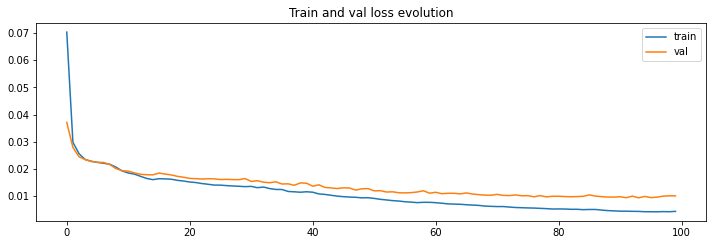

In [19]:
plot_performance(history)

ValueError: ignored

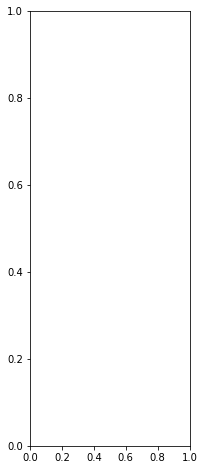

In [20]:
conv_encoder = Model(input_img,encoded)
encoded_imgs = conv_encoder.predict(X_test)

n = 6
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
decoded_imgs = autoencoder.predict(X_test)

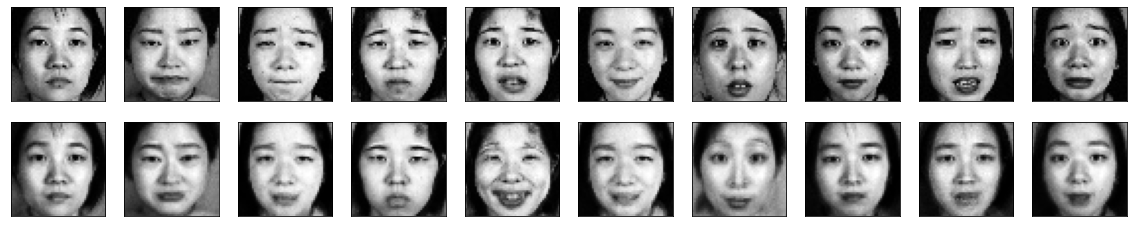

In [22]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(48, 48))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(48, 48))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [23]:
epochs = 100
batch_size = 32

history1 = autoencoder1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
6/6 [==============================] - 2s 50ms/step - loss: 3.1253 - accuracy: 0.1765 - val_loss: 2.1111 - val_accuracy: 0.1395
Epoch 2/100
6/6 [==============================] - 0s 18ms/step - loss: 1.8533 - accuracy: 0.2000 - val_loss: 2.0562 - val_accuracy: 0.1628
Epoch 3/100
6/6 [==============================] - 0s 18ms/step - loss: 1.7331 - accuracy: 0.3529 - val_loss: 1.9030 - val_accuracy: 0.2791
Epoch 4/100
6/6 [==============================] - 0s 20ms/step - loss: 1.6604 - accuracy: 0.3706 - val_loss: 1.8863 - val_accuracy: 0.2791
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 1.5709 - accuracy: 0.3588 - val_loss: 1.9434 - val_accuracy: 0.2558
Epoch 6/100
6/6 [==============================] - 0s 19ms/step - loss: 1.4572 - accuracy: 0.4529 - val_loss: 1.8571 - val_accuracy: 0.2791
Epoch 7/100
6/6 [==============================] - 0s 19ms/step - loss: 1.3814 - accuracy: 0.4588 - val_loss: 1.8197 - val_accuracy: 0.3488
Epoch 8/100
6/6 [===

In [24]:
autoencoder1.save_weights('classification_complete.h5')

In [25]:
#Model Save
autoencoder1.save_weights('model_weights.h5')
autoencoder1.save('model_keras.h5')

<Figure size 432x288 with 0 Axes>

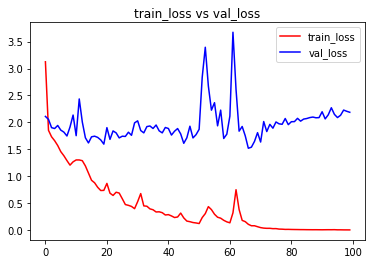

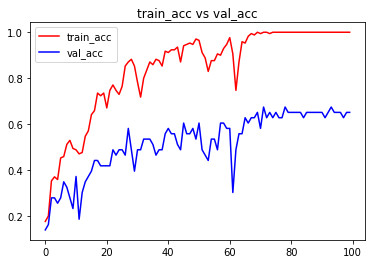

<Figure size 432x288 with 0 Axes>

In [26]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=history1.history['loss']
val_loss=history1.history['val_loss']
train_acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [27]:
test_eval = autoencoder1.evaluate(X_test,y_test, verbose=0)

In [28]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 2.1880269050598145
Test accuracy: 0.6511628031730652


total wrong validation predictions: 15


              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.55      0.67      0.60         9
           2       0.67      0.40      0.50        10
           3       0.50      0.60      0.55         5
           4       0.75      0.75      0.75         4
           5       0.57      1.00      0.73         4
           6       0.67      1.00      0.80         2

    accuracy                           0.65        43
   macro avg       0.67      0.73      0.67        43
weighted avg       0.69      0.65      0.65        43



Text(0.5, 76.01999999999997, 'Predicted')

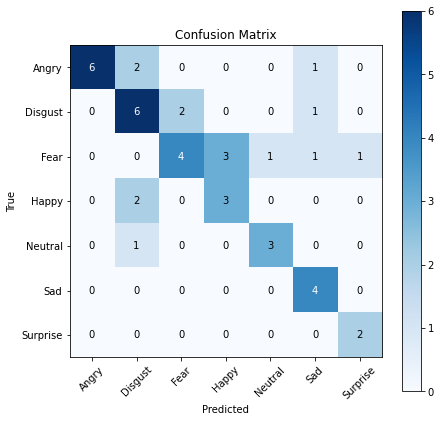

In [29]:
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
classNames=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
tick_marks = np.arange(len(classNames)) 

predict_x=autoencoder1.predict(X_test) 
yhat_valid=np.argmax(predict_x,axis=1)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), yhat_valid, figsize=(7,7))
pyplot.savefig("confusion_matrix.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_test, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_test, axis=1), yhat_valid))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
plt.ylabel('True')
plt.xlabel('Predicted')

total wrong validation predictions: 15


              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.55      0.67      0.60         9
           2       0.67      0.40      0.50        10
           3       0.50      0.60      0.55         5
           4       0.75      0.75      0.75         4
           5       0.57      1.00      0.73         4
           6       0.67      1.00      0.80         2

    accuracy                           0.65        43
   macro avg       0.67      0.73      0.67        43
weighted avg       0.69      0.65      0.65        43



Text(0.5, 76.01999999999997, 'Predicted')

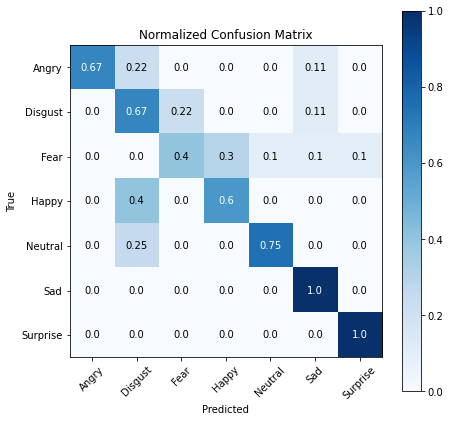

In [30]:
from matplotlib import pyplot as plt
classNames=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
tick_marks = np.arange(len(classNames)) 

predict_x=autoencoder1.predict(X_test) 
yhat_valid=np.argmax(predict_x,axis=1)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), yhat_valid, figsize=(7,7),normalize='true')
pyplot.savefig("confusion_matrix 2.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_test, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_test, axis=1), yhat_valid))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
plt.ylabel('True')
plt.xlabel('Predicted')

In [31]:
from sklearn.metrics import roc_curve,auc
from itertools import cycle
new_label = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
final_label = new_label
new_class = 7
y_pred = autoencoder1.predict(X_test)
y_pred_ravel = y_pred.ravel()
lw = 2

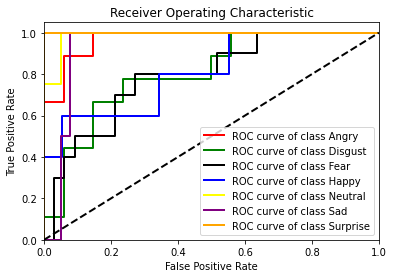

<Figure size 432x288 with 0 Axes>

In [32]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(new_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
#colors = cycle(['red', 'green','black'])
colors = cycle(['red', 'green','black','blue', 'yellow','purple','orange'])
for i, color in zip(range(new_class), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0}'''.format(final_label[i]))
    

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
pyplot.savefig("Roc.png")
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
pyplot.savefig("Roc.png")